In [33]:
import seaborn as sns
import pandas as pd
sns.set()
pd.options.display.expand_frame_repr = False

from scipy.stats import boxcox
from dfprepare import norm_data

from importlib import reload
import LRR
reload(LRR)
from LRR import *

,carbon_monoxide,tar,nicotine,weight
0,14.1,0.86,0.9853,13.6
1,16.0,1.06,1.0938,16.6
2,29.8,2.03,1.1650,23.5
3,8.0,0.67,0.9280,10.2
4,4.1,0.40,0.9462,5.4
5,15.0,1.04,0.8885,15.0
6,8.8,0.76,1.0267,9.0
7,12.4,0.95,0.9225,12.3
8,16.6,1.12,0.9372,16.3
9,14.9,1.02,0.8858,15.4


,carbon_monoxide,tar,nicotine,weight
0,0.454861,0.384211,0.526981,0.550000
1,0.520833,0.489474,0.812582,0.686364
2,1.000000,1.000000,1.000000,1.000000
3,0.243056,0.284211,0.376152,0.395455
4,0.107639,0.142105,0.424059,0.177273
5,0.486111,0.478947,0.272177,0.613636
6,0.270833,0.331579,0.635957,0.340909
7,0.395833,0.431579,0.361674,0.490909
8,0.541667,0.521053,0.400369,0.672727
9,0.482639,0.468421,0.265070,0.631818


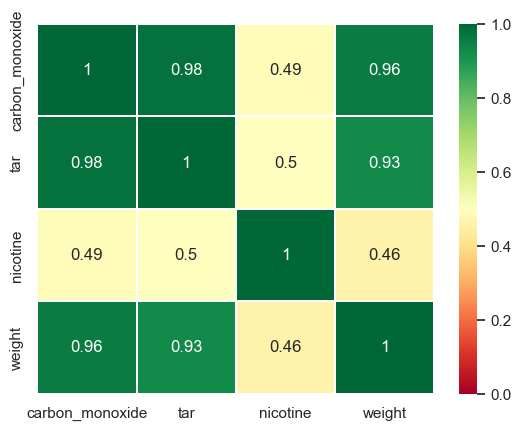

In [34]:
# Read dataframe
data = pd.read_csv('cigarettes.txt', names=['Brand', 'carbon_monoxide', 'tar', 'nicotine', 'weight'])
data = data.drop('Brand', axis=1)
data.dropna(inplace=True)
display(data)

# Normalization
data = norm_data(data)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

# Dependent variable
explore_column = 'carbon_monoxide' 

### Строим базовую модель

                         carbon_monoxide
Model:              OLS              Adj. R-squared:     0.970    
Dependent Variable: carbon_monoxide  AIC:                -94.2398 
Date:               2023-12-08 03:55 BIC:                -89.3643 
No. Observations:   25               Log-Likelihood:     51.120   
Df Model:           3                F-statistic:        258.3    
Df Residuals:       21               Prob (F-statistic): 9.95e-17 
R-squared:          0.974            Scale:              0.0011672
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      -0.0436     0.0196   -2.2298   0.0368   -0.0843   -0.0029
tar         0.6650     0.1014    6.5598   0.0000    0.4542    0.8758
nicotine    0.0022     0.0349    0.0645   0.9492   -0.0703    0.0748
weight      0.3406     0.0857    3.9736   0.0007    0.1623    0.5188
-------

,Variable,VIF,Tolerance
0,const,8.199589,0.121957
1,tar,7.338188,0.136273
2,nicotine,1.333667,0.749813
3,weight,7.011605,0.142621


,const,tar,nicotine,weight,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,4.972225,0.03680247114913934,21.0,1.0
1,0.0,1.0,0.0,0.0,43.030412,1.6959232406336958e-06,21.0,1.0
2,0.0,0.0,1.0,0.0,0.004155,0.9492141011532063,21.0,1.0
3,0.0,0.0,0.0,1.0,15.789224,0.0006920652484494694,21.0,1.0
4,"[1.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0]",1005.799098,1.1754333663979179e-23,21.0,4.0


,dfb_const,dfb_tar,dfb_nicotine,dfb_weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.010305,-0.257601,0.080907,0.258683,0.045853,1.647378,0.063306,0.428268,1.722848,0.447888
1,-0.022931,-0.023380,0.031074,0.023474,0.000576,0.107551,0.166207,0.048019,0.104988,0.046874
2,-1.113964,1.748143,0.437587,-1.186843,1.411701,1.759391,0.645920,2.376301,1.859498,2.511509
3,-0.200628,0.068926,0.053222,-0.031238,0.019624,-1.140943,0.056872,-0.280173,-1.149649,-0.282311
4,-0.043373,-0.000752,-0.014367,0.021287,0.000876,-0.144423,0.143771,-0.059180,-0.141012,-0.057783
5,0.005303,0.002482,-0.014528,0.002718,0.000093,0.050699,0.126748,0.019315,0.049480,0.018851
6,-0.096164,-0.118868,-0.151164,0.188609,0.022024,-0.743327,0.137515,-0.296810,-0.735148,-0.293544
7,-0.073103,-0.080587,0.074278,0.063113,0.005045,-0.475323,0.081996,-0.142057,-0.466383,-0.139385
8,0.002180,0.002799,-0.047204,0.023911,0.001932,0.269659,0.096071,0.087911,0.263617,0.085941
9,-0.002834,0.000823,0.009393,-0.004274,0.000042,-0.032474,0.138078,-0.012997,-0.031692,-0.012685


,student_resid,unadj_p,bonferroni(p)
0,1.722848,0.100344,1.0
1,0.104988,0.917431,1.0
2,1.859498,0.077732,1.0
3,-1.149649,0.263851,1.0
4,-0.141012,0.889271,1.0
5,0.049480,0.961028,1.0
6,-0.735148,0.470783,1.0
7,-0.466383,0.645981,1.0
8,0.263617,0.794772,1.0
9,-0.031692,0.975032,1.0


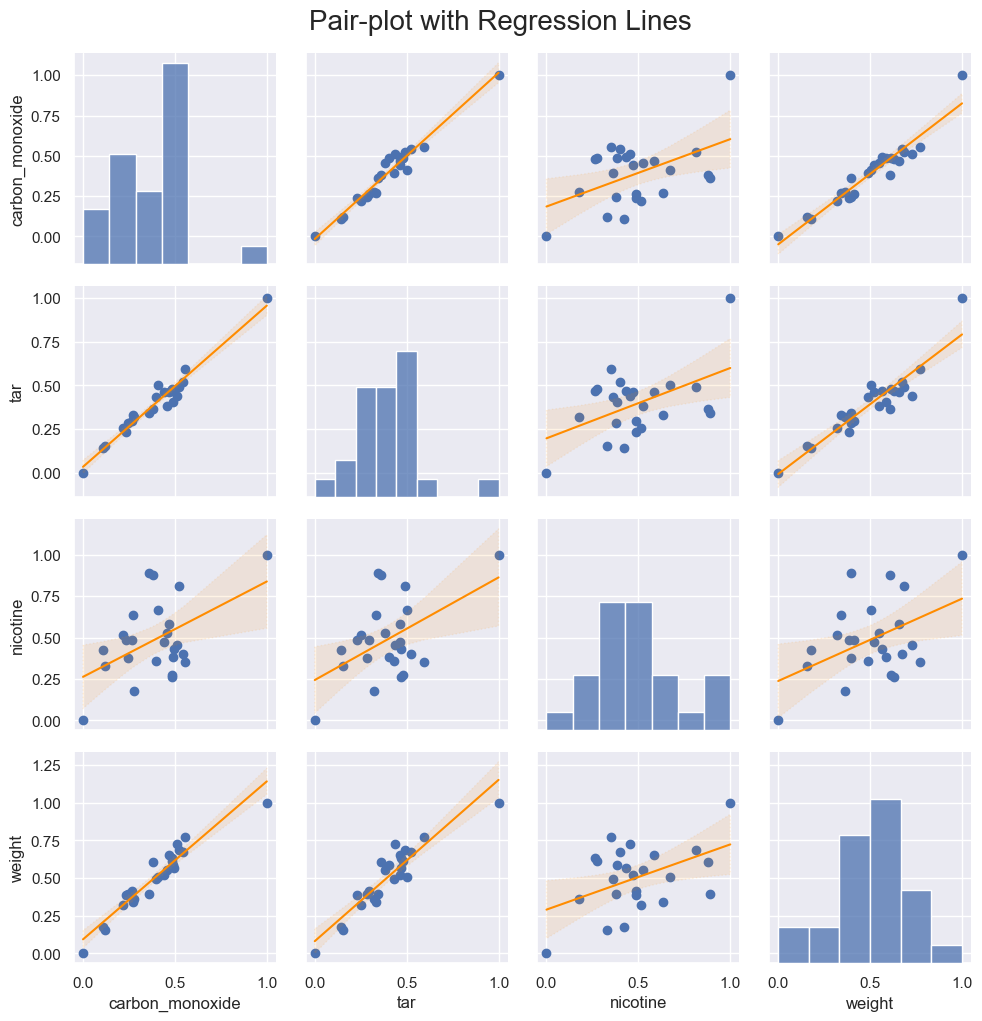

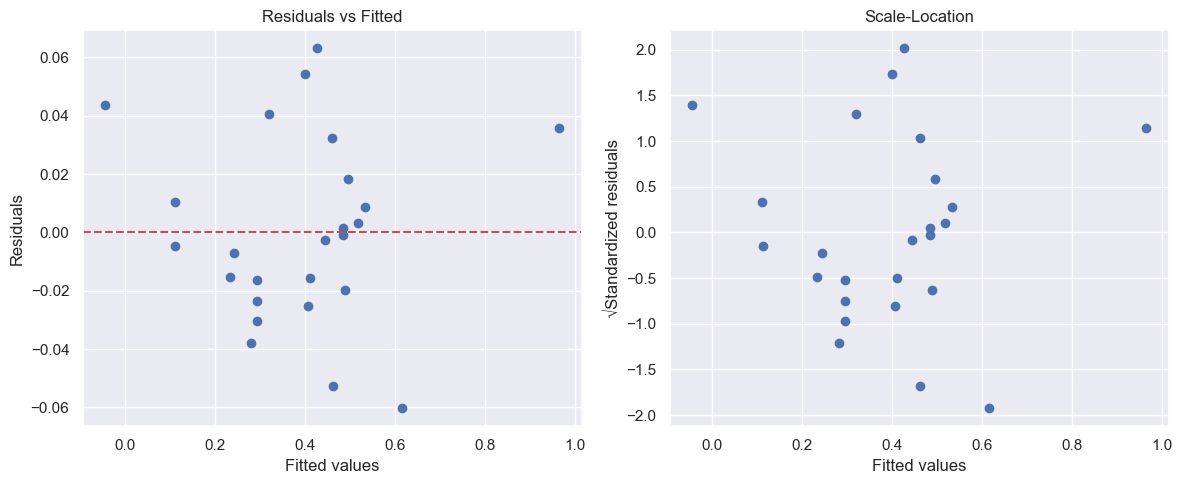

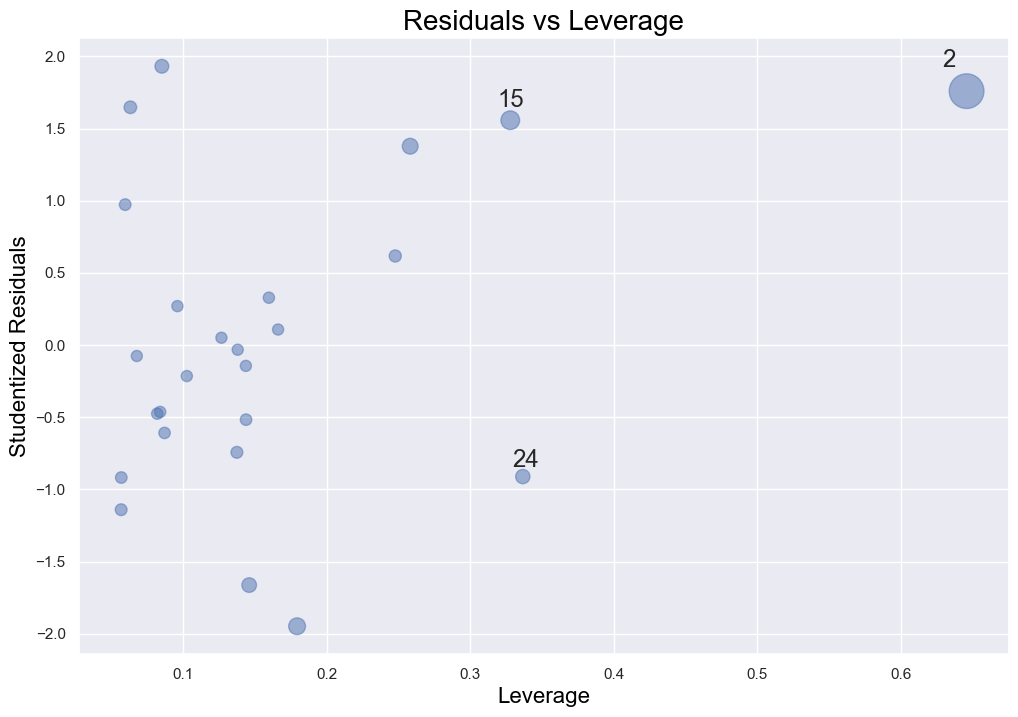

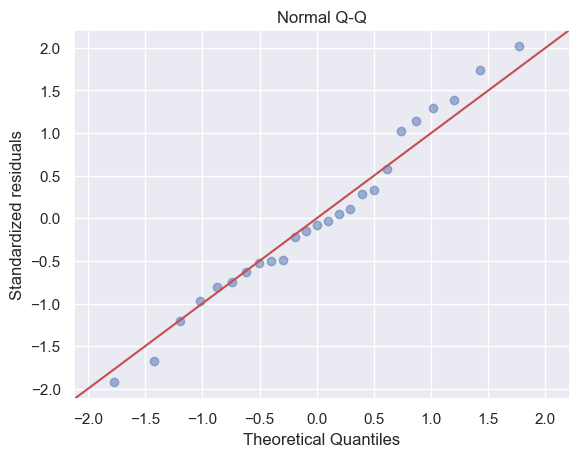

                                STEPS AIC                              
Selected Features: ['tar', 'nicotine', 'weight']
AIC: -94.23981158876805
Selected Features: ['tar', 'weight']
AIC: -96.23486563233041


In [35]:
base_research = LinearRegressionResearch(y=data[explore_column], x=data.drop(columns=explore_column))
base_research.info()
base_research.draw_plots()
new_data = base_research.stepwise_selection(criteria='AIC')

### Проведём исследование улучшенной модели с помощью (AIC/BIC)

In [36]:
display(new_data)

,carbon_monoxide,tar,weight
0,0.454861,0.384211,0.550000
1,0.520833,0.489474,0.686364
2,1.000000,1.000000,1.000000
3,0.243056,0.284211,0.395455
4,0.107639,0.142105,0.177273
5,0.486111,0.478947,0.613636
6,0.270833,0.331579,0.340909
7,0.395833,0.431579,0.490909
8,0.541667,0.521053,0.672727
9,0.482639,0.468421,0.631818


                         carbon_monoxide
Model:              OLS              Adj. R-squared:     0.971    
Dependent Variable: carbon_monoxide  AIC:                -96.2349 
Date:               2023-12-08 03:55 BIC:                -92.5782 
No. Observations:   25               Log-Likelihood:     51.117   
Df Model:           2                F-statistic:        405.8    
Df Residuals:       22               Prob (F-statistic): 4.33e-18 
R-squared:          0.974            Scale:              0.0011144
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      -0.0431     0.0172   -2.5014   0.0203   -0.0788   -0.0074
tar         0.6664     0.0968    6.8823   0.0000    0.4656    0.8672
weight      0.3406     0.0838    4.0668   0.0005    0.1669    0.5143
------------------------------------------------------------------
Omnibus: 

,Variable,VIF,Tolerance
0,const,6.654942,0.150264
1,tar,7.011561,0.142622
2,weight,7.011561,0.142622


,const,tar,weight,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,6.256754,0.020307160836218238,22.0,1.0
1,0.0,1.0,0.0,47.365914,6.525518593535632e-07,22.0,1.0
2,0.0,0.0,1.0,16.539262,0.0005124135994788805,22.0,1.0
3,"[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]",1404.646353,2.8621313189392143e-25,22.0,3.0


,dfb_const,dfb_tar,dfb_weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.051643,-0.252054,0.265180,0.061901,1.687217,0.061240,0.430934,1.766683,0.451230
1,-0.011627,-0.019092,0.026125,0.000529,0.124268,0.093162,0.039830,0.121453,0.038928
2,-1.001219,1.837932,-1.157471,1.746029,1.767850,0.626312,2.288687,1.864726,2.414104
3,-0.202017,0.084065,-0.031889,0.026457,-1.169479,0.054850,-0.281729,-1.179853,-0.284228
4,-0.053299,-0.003746,0.020569,0.001024,-0.140358,0.134883,-0.055422,-0.137193,-0.054172
5,-0.000658,-0.000353,0.001585,0.000018,0.031199,0.051461,0.007267,0.030483,0.007100
6,-0.173200,-0.148761,0.181555,0.020069,-0.731867,0.101048,-0.245373,-0.723907,-0.242705
7,-0.046309,-0.067801,0.064623,0.005008,-0.490781,0.058711,-0.122570,-0.482144,-0.120413
8,-0.019308,-0.006960,0.022606,0.001621,0.260029,0.067088,0.069730,0.254442,0.068232
9,0.002064,0.004292,-0.006360,0.000057,-0.050611,0.062362,-0.013052,-0.049450,-0.012753


,student_resid,unadj_p,bonferroni(p)
0,1.766683,0.091814,1.0
1,0.121453,0.904487,1.0
2,1.864726,0.076257,1.0
3,-1.179853,0.251252,1.0
4,-0.137193,0.892185,1.0
5,0.030483,0.975970,1.0
6,-0.723907,0.477110,1.0
7,-0.482144,0.634691,1.0
8,0.254442,0.801629,1.0
9,-0.049450,0.961028,1.0


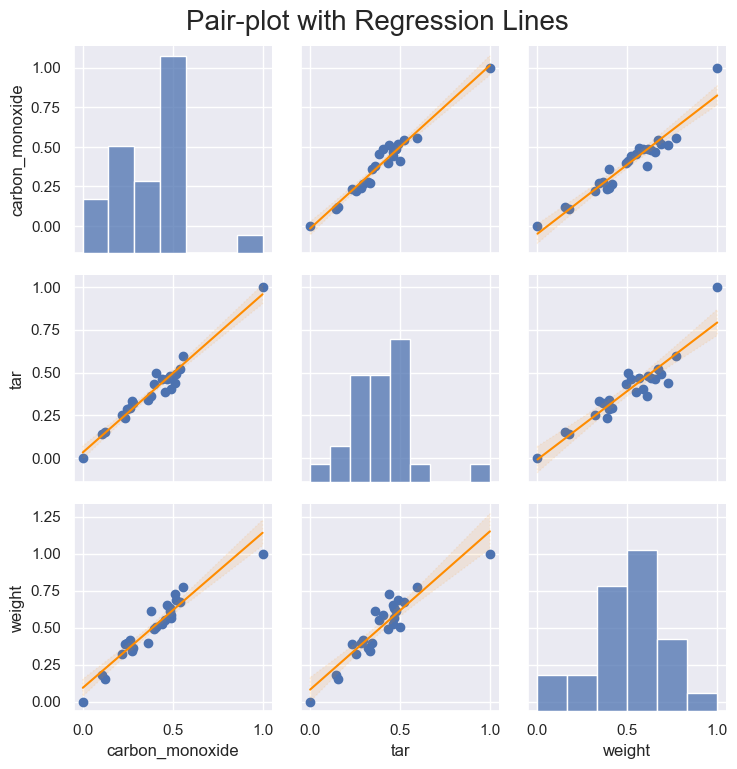

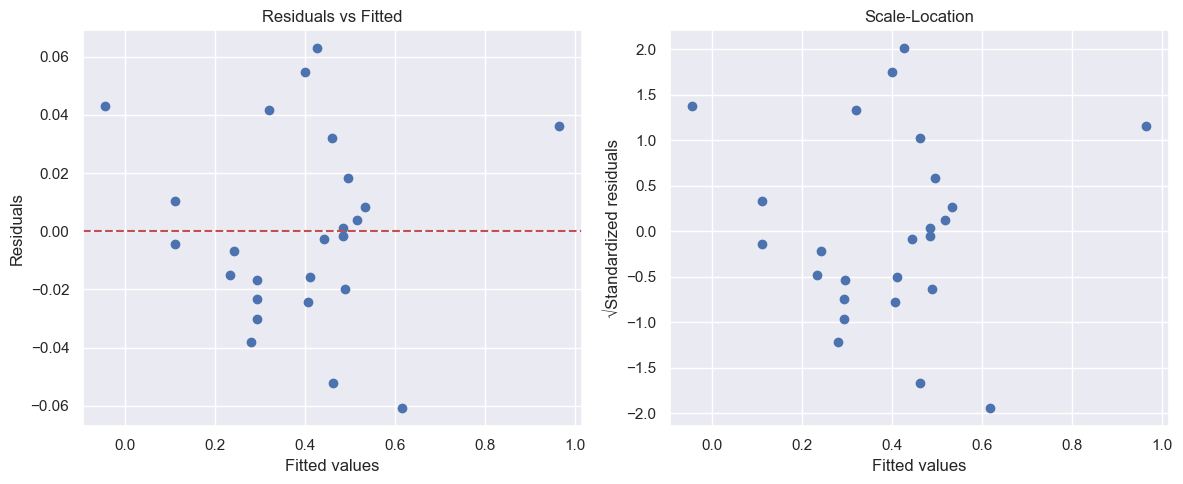

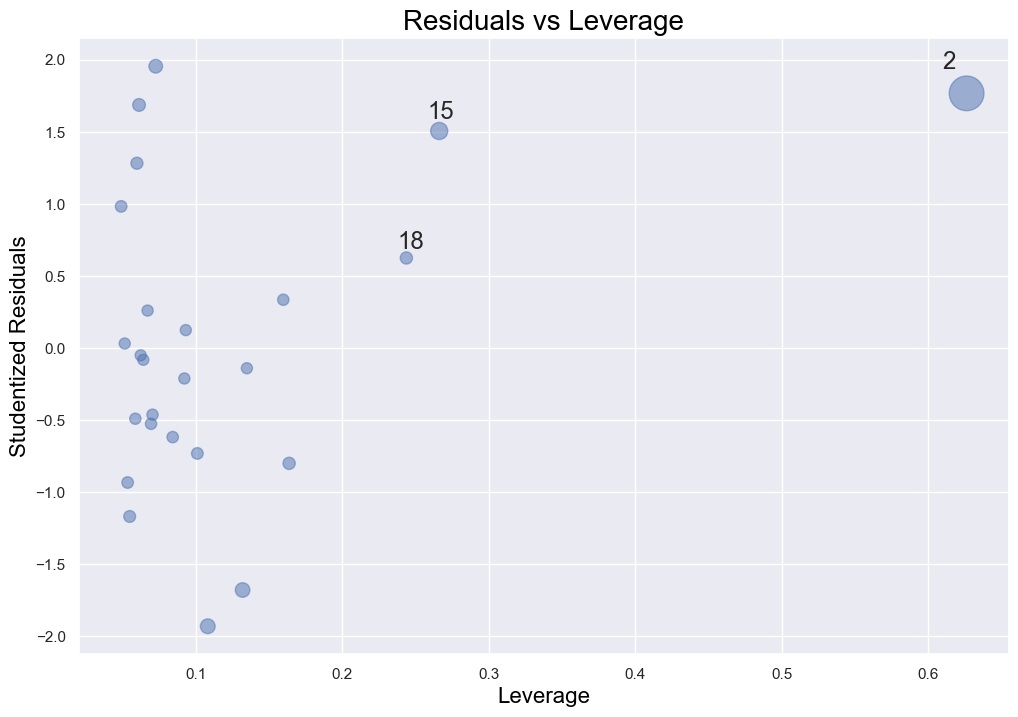

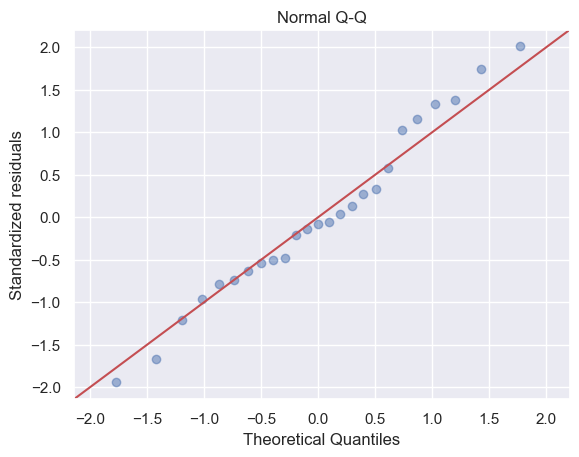

In [37]:
# Проводим анализ заново
enhanced_research = LinearRegressionResearch(y=new_data[explore_column], 
                                             x=new_data.drop(columns=explore_column))
enhanced_research.info()
enhanced_research.draw_plots()

### Попытаемся улучшить уже улучшенную модель при помощи (Box-Cox)

In [38]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1e-6)  # + 1 чтобы не было 0-значений
new_data_t = new_data.copy()
new_data_t[explore_column] = y_transformed
display(new_data_t)

,carbon_monoxide,tar,weight
0,-6.276137e-01,0.384211,0.550000
1,-5.397048e-01,0.489474,0.686364
2,9.999998e-07,1.000000,1.000000
3,-9.529931e-01,0.284211,0.395455
4,-1.228423e+00,0.142105,0.177273
5,-5.853793e-01,0.478947,0.613636
6,-9.051851e-01,0.331579,0.340909
7,-7.106973e-01,0.431579,0.490909
8,-5.128836e-01,0.521053,0.672727
9,-5.900174e-01,0.468421,0.631818


                         carbon_monoxide
Model:              OLS              Adj. R-squared:     0.950    
Dependent Variable: carbon_monoxide  AIC:                -58.3849 
Date:               2023-12-08 03:55 BIC:                -54.7283 
No. Observations:   25               Log-Likelihood:     32.192   
Df Model:           2                F-statistic:        227.3    
Df Residuals:       22               Prob (F-statistic): 2.02e-15 
R-squared:          0.954            Scale:              0.0050648
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     -1.4644     0.0367   -39.8812   0.0000   -1.5405   -1.3882
tar        0.6460     0.2064     3.1295   0.0049    0.2179    1.0741
weight     0.9049     0.1785     5.0680   0.0000    0.5346    1.2752
------------------------------------------------------------------
Omnibus: 

,Variable,VIF,Tolerance
0,const,6.654942,0.150264
1,tar,7.011561,0.142622
2,weight,7.011561,0.142622


,const,tar,weight,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,1590.509060,5.1600508254398725e-22,22.0,1.0
1,0.0,1.0,0.0,9.793699,0.004876650976768861,22.0,1.0
2,0.0,0.0,1.0,25.684211,4.4696939585091385e-05,22.0,1.0
3,"[1.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 1.0]",1094.437913,4.380301937818368e-24,22.0,3.0


,dfb_const,dfb_tar,dfb_weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.039219,-0.191414,0.201382,3.776797e-02,1.317901,0.061240,0.336606,1.341650,0.342672
1,0.017417,0.028597,-0.039132,1.185467e-03,-0.186059,0.093162,-0.059636,-0.181924,-0.058310
2,1.151731,-2.114226,1.331472,2.209003e+00,-1.988464,0.626312,-2.574298,-2.145047,-2.777012
3,-0.072995,0.030375,-0.011522,3.651589e-03,-0.434473,0.054850,-0.104665,-0.426316,-0.102700
4,-0.093380,-0.006563,0.036037,3.136908e-03,-0.245680,0.134883,-0.097009,-0.240362,-0.094909
5,-0.004362,-0.002340,0.010511,7.724892e-04,0.206678,0.051461,0.048140,0.202122,0.047079
6,0.127311,0.109347,-0.133453,1.096634e-02,0.540999,0.101048,0.181381,0.532112,0.178401
7,0.041858,0.061284,-0.058412,4.099622e-03,0.444054,0.058711,0.110900,0.435802,0.108839
8,-0.006635,-0.002392,0.007769,1.919338e-04,0.089482,0.067088,0.023996,0.087441,0.023448
9,-0.000021,-0.000043,0.000064,5.714470e-09,0.000508,0.062362,0.000131,0.000496,0.000128


,student_resid,unadj_p,bonferroni(p)
0,1.341650,0.194039,1.000000
1,-0.181924,0.857387,1.000000
2,-2.145047,0.043800,1.000000
3,-0.426316,0.674215,1.000000
4,-0.240362,0.812381,1.000000
5,0.202122,0.841766,1.000000
6,0.532112,0.600234,1.000000
7,0.435802,0.667427,1.000000
8,0.087441,0.931150,1.000000
9,0.000496,0.999609,1.000000


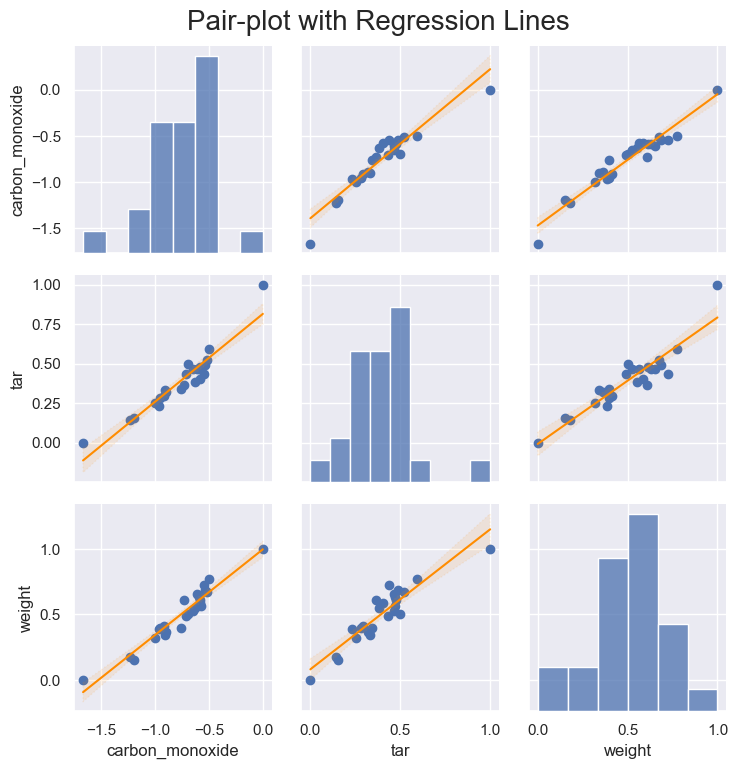

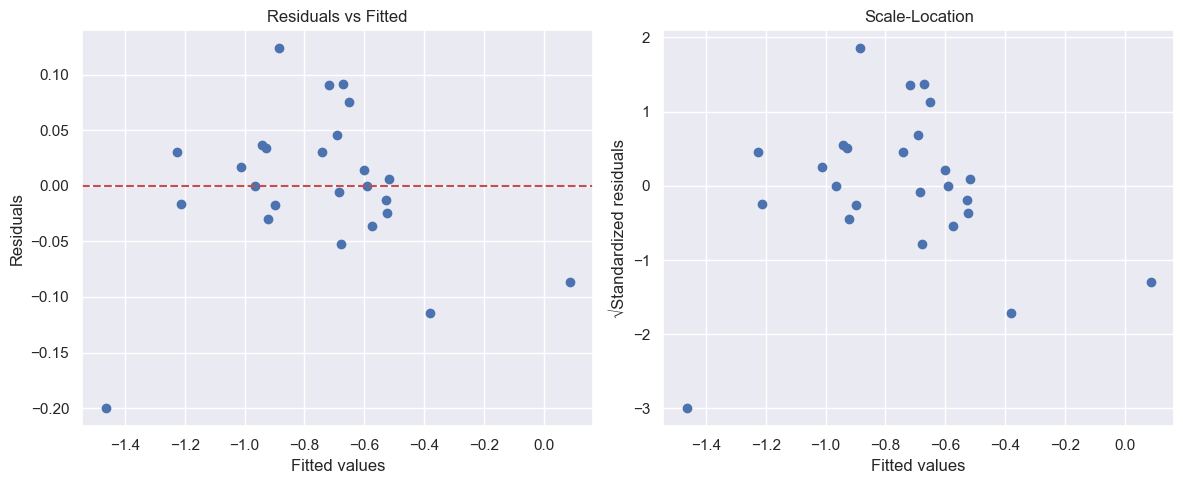

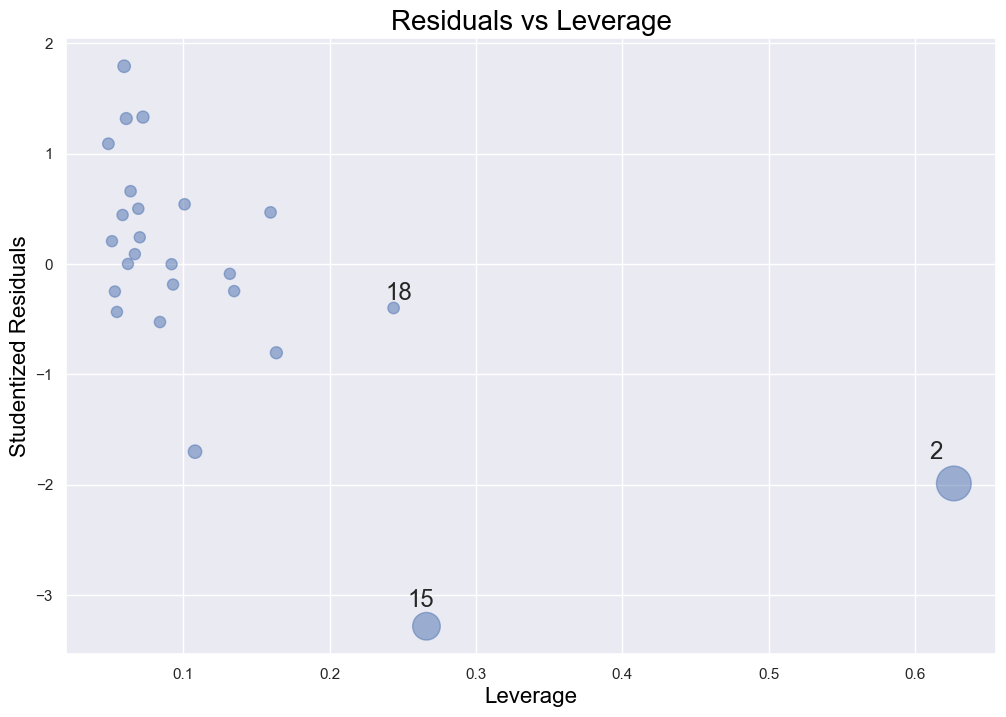

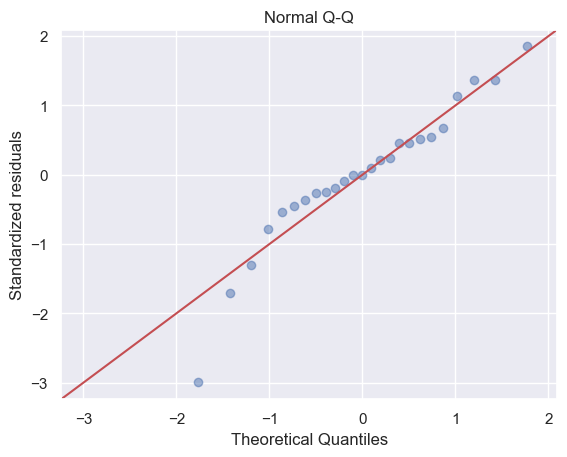

In [39]:
# Проводим анализ заново
enhanced_research = LinearRegressionResearch(y=new_data_t[explore_column], 
                                             x=new_data_t.drop(columns=explore_column))
enhanced_research.info()
enhanced_research.draw_plots()